In [1]:
import pandas as pd
from sklearn import datasets, model_selection
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
iris = datasets.load_iris()

In [3]:
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_label = pd.Series(data=iris.target)
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris_data, iris_label, test_size=0.25, random_state=0)

In [4]:
clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [5]:
y_pred = clf.predict(X_test)

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
conf_mat = confusion_matrix(y_test, y_pred)

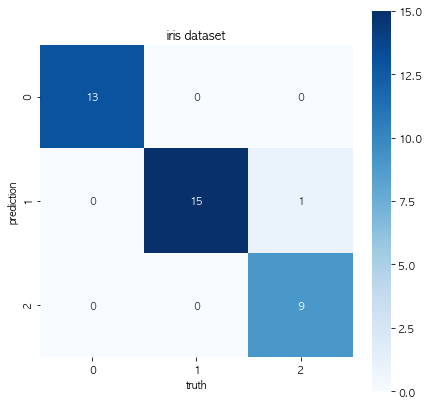

In [8]:
index = list("012")
columns = list("012")
df = pd.DataFrame(conf_mat, index=index, columns=columns)
fig = plt.figure(figsize = (7,7))
sns.heatmap(df, annot=True, square=True, fmt='.0f', cmap="Blues")
plt.title('iris dataset')
plt.xlabel('truth')
plt.ylabel('prediction')
# https://qiita.com/msrks/items/01c51a769f24cd649459

In [9]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X_train, y_train, test_size=0.25, random_state=0)

In [10]:
clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [11]:
y_pred = clf.predict(X_valid)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid, y_pred)

0.9642857142857143

In [13]:
conf_mat = confusion_matrix(y_valid, y_pred)

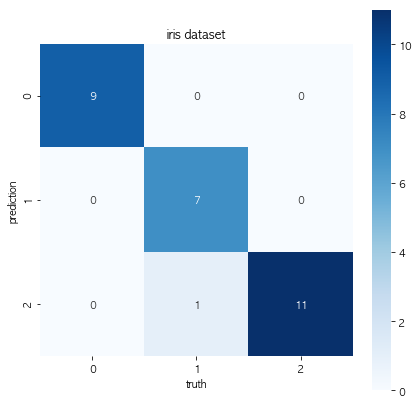

In [14]:
index = list("012")
columns = list("012")
df = pd.DataFrame(conf_mat, index=index, columns=columns)
fig = plt.figure(figsize = (7,7))
sns.heatmap(df, annot=True, square=True, fmt='.0f', cmap="Blues")
plt.title('iris dataset')
plt.xlabel('truth')
plt.ylabel('prediction')

In [15]:
from sklearn.model_selection import KFold

In [16]:
kf = KFold(n_splits=3, shuffle=True, random_state=0)

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_label = pd.Series(data=iris.target)
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris_data, iris_label, test_size=0.25, random_state=0)
scores = cross_val_score(clf, X_train, y_train, cv=kf)

In [19]:
scores

array([ 0.97368421,  0.91891892,  0.97297297])

In [20]:
scores.mean()

0.95519203413940268